In [1]:
# OJOK EMMANUEL NSUBUGA
# 21/U/06816/PS
# 2100706816

# Decision Tree Model
# import libraries
import numpy as np #linear algebra
import pandas as pd # data preparstion and preprocessing or data manipulation
import seaborn as sns # Statistical data visualization
import matplotlib.pyplot as plt # plotting and data visualization
%matplotlib inline

import graphviz # visualization of leaf notes

# ML library Decision Tree
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split # split data into training and testing sets

# Control display | optional
pd.options.display.max_columns = 50
sns.set(style="darkgrid",rc={"axes.facecolor": "#616E7C"})

# ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# lead / read dataset
df = pd.read_csv('heart_disease.csv')
df.head() # display first 5 rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
"""
cp: chest pain type
trtbps: resting blood pressure (in mm Hg)
chol: cholestoral in mg/dl fetched via BMI sensor
fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
restecg: resting electrocardiographic results
exng: exercise induced angina (1 = yes; 0 = no)
oldpeak: ST depression induced 
slope: slope of peak exercise
ca: number of major vessels (0-3) colored by flourosopy
thal: normal; fixed defect; reversable defect
target: have heart disease or not (1=yes, 0=no)
"""

In [3]:
# show number of people with heart disease
# Column for target

df.target.value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [8]:
# show percentage of male and female
count_female = len(df[df.sex == 0])
count_male = len(df[df.sex == 1])

# show the output
print("Percentage of female patients: {:.2f}%".format((count_female/len(df.sex))*100))
print("Percentage of male patients: {:.2f}%".format((count_male/len(df.sex))*100))

Percentage of female patients: 30.44%
Percentage of male patients: 69.56%


In [9]:
# show the mean

df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


In [10]:
# show null or NaN values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
# ML train and test
# create LogisticRegression object
y = df.target.values
x_data = df.drop(['target'], axis = 1)

In [12]:
# split data for training 67% and testing 33%  
x_train, x_test, y_train, y_test = train_test_split(x_data, y, test_size = 0.33, random_state=0)

In [13]:
# check shape of data remaining after splitting for training and testing
x_train.shape, x_test.shape

((686, 13), (339, 13))

In [14]:
# check the data type
x_train.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
dtype: object

In [15]:
# checking x_train header
x_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
824,61,1,0,138,166,0,0,125,1,3.6,1,1,2
263,55,0,1,132,342,0,1,166,0,1.2,2,0,2
827,57,1,2,128,229,0,0,150,0,0.4,1,1,3
828,44,1,2,130,233,0,1,179,1,0.4,2,0,2
634,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [16]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 0, max_depth=3)
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [17]:
# predict the class label for the test data using the decision tree classifier
y_pred_gini = clf_gini.predict(x_test)
from sklearn.metrics import accuracy_score
print("Model Accuracy score with criteria gini index:{0:0.4f}".format(accuracy_score(y_test, y_pred_gini))) 

Model Accuracy score with criteria gini index:0.8378


In [19]:
# Predict class label for training data using decision tree classifier

y_pred_train_gini = clf_gini.predict(x_train)
y_pred_train_gini

array([0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [21]:
# Print training and testing set accuracy score
print("Training set accuracy score: {0:0.4f}".format(clf_gini.score(x_train, y_train)))
print("Testing set accuracy score: {0:0.4f}".format(clf_gini.score(x_test, y_test)))

Training set accuracy score: 0.8513
Testing set accuracy score: 0.8378


[Text(0.5, 0.875, 'x[2] <= 0.5\ngini = 0.5\nsamples = 686\nvalue = [341, 345]'),
 Text(0.25, 0.625, 'x[11] <= 0.5\ngini = 0.369\nsamples = 332\nvalue = [251, 81]'),
 Text(0.125, 0.375, 'x[12] <= 2.5\ngini = 0.5\nsamples = 144\nvalue = [74, 70]'),
 Text(0.0625, 0.125, 'gini = 0.381\nsamples = 82\nvalue = [21, 61]'),
 Text(0.1875, 0.125, 'gini = 0.248\nsamples = 62\nvalue = [53, 9]'),
 Text(0.375, 0.375, 'x[3] <= 109.0\ngini = 0.11\nsamples = 188\nvalue = [177, 11]'),
 Text(0.3125, 0.125, 'gini = 0.463\nsamples = 11\nvalue = [7, 4]'),
 Text(0.4375, 0.125, 'gini = 0.076\nsamples = 177\nvalue = [170, 7]'),
 Text(0.75, 0.625, 'x[0] <= 56.5\ngini = 0.379\nsamples = 354\nvalue = [90, 264]'),
 Text(0.625, 0.375, 'x[9] <= 3.55\ngini = 0.212\nsamples = 216\nvalue = [26, 190]'),
 Text(0.5625, 0.125, 'gini = 0.179\nsamples = 211\nvalue = [21, 190]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.875, 0.375, 'x[1] <= 0.5\ngini = 0.497\nsamples = 138\nvalue = [64, 74]'),
 

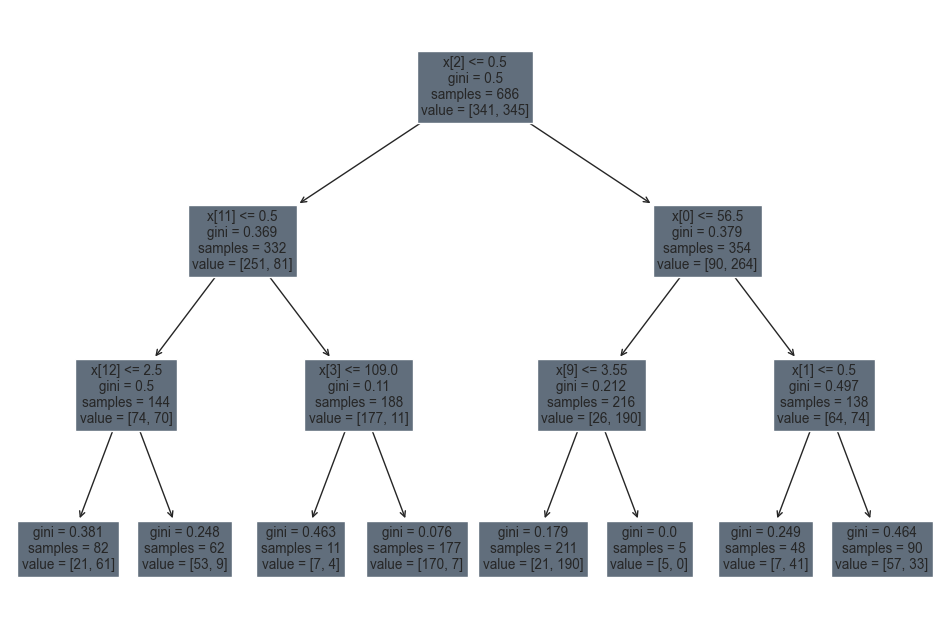

In [22]:
# 1st way to visualize Decision tree leaft node | create figure for width and height
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_gini.fit(x_train, y_train))

In [23]:
# 2 nd way
# visualize decision tree leaf nodes
import graphviz
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split

# load data
heart_data = pd.read_csv('heart_disease.csv')

y = heart_data["target"].values

x_data = heart_data.drop(["target"],axis=1)


# train the decision tree classifier

model = tree.DecisionTreeClassifier()

model.fit(x_data, y)

# Get the class names from the dataset
class_names = heart_data['target'].unique().astype(str)

# Generate the graphviz visualisation
tree.export_graphviz(model, out_file="heart_disease1.dot", feature_names=x_data.columns, class_names=class_names, filled=True,rounded=True)

dot_data = tree.export_graphviz(clf_gini, out_file=None, filled=True, rounded=True, special_characters=True, feature_names = x_data.columns)